In [1]:
import pandas as pd
import seaborn as sns

In [2]:
# Obtenir arxiu csv on es relaciona cada id de cada plat amb els CHO que continguin
csv1 = pd.read_csv('gs://bucket-tfg/Nutrition5k dataset/dish_metadata_cafe1.csv', on_bad_lines='skip', header=None)
csv2 = pd.read_csv('gs://bucket-tfg/Nutrition5k dataset/dish_metadata_cafe2.csv', on_bad_lines='skip', header=None)
# dish_id, total_calories, total_mass, total_fat, total_carb, total_protein, num_ingrs, (ingr_1_id, ingr_1_name, 
# ingr_1_grams, ingr_1_calories, ingr_1_fat, ingr_1_carb, ingr_1_protein, ...)

In [3]:
# Llista cho de totes le mostres
llista_cho = []
for i in range(len(csv1)):
    llista_cho.append(csv1[4][i])

<AxesSubplot:>

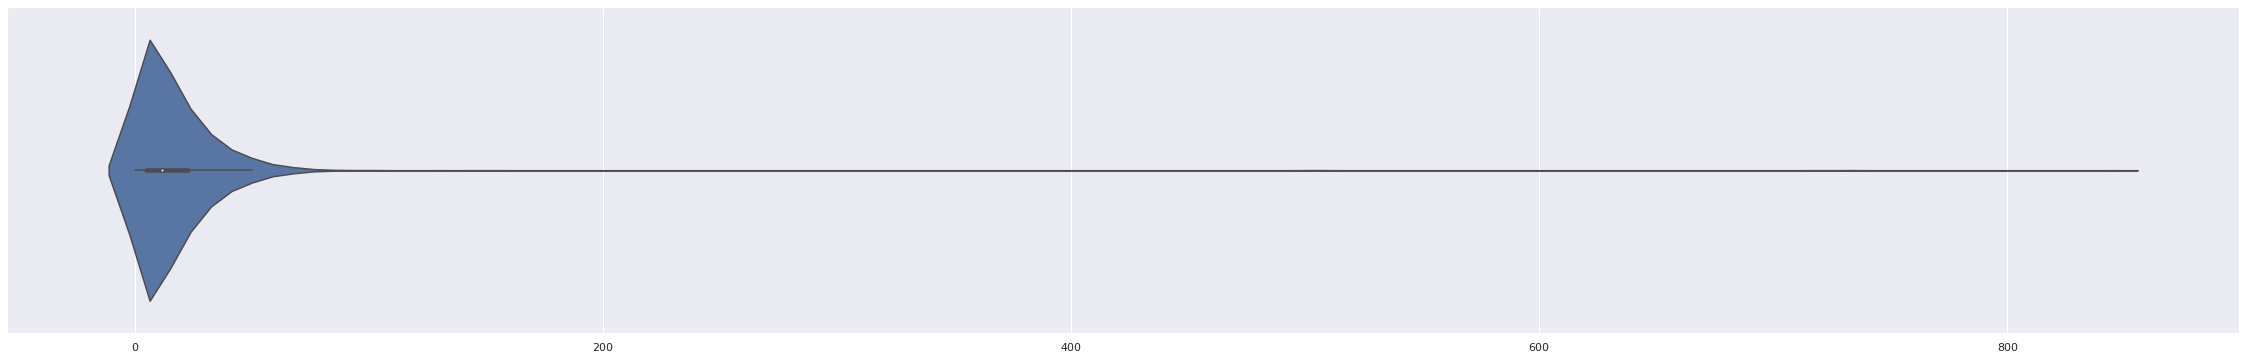

In [4]:
# Gràfic de violí de la quantitat de CHO
sns.set(rc={'figure.figsize':(40,6)})
sns.violinplot(x=llista_cho)

<AxesSubplot:>

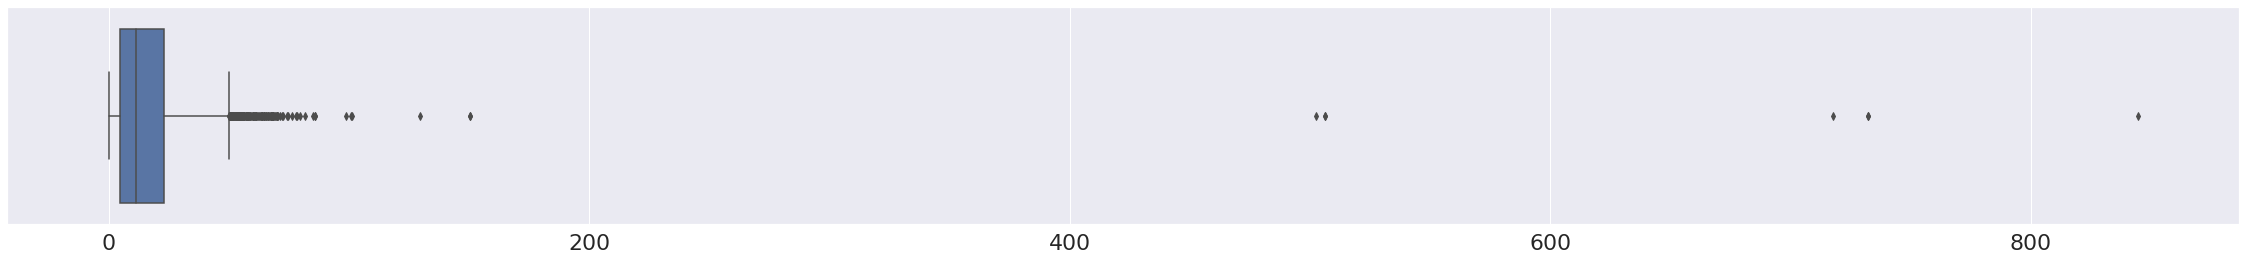

In [23]:
# Gràfic de violí de la quantitat de CHO
sns.set(rc={'figure.figsize':(40,4)}, font_scale = 2)
sns.boxplot(x=llista_cho)

In [4]:
llista_ingred_plat = []
sep = 0
fi = False
nom_ing = csv1[7 + sep][0]
while fi == False:
    if sep < 119 and nom_ing != None:
        nom_ing = csv1[7 + sep][0]
        llista_ingred_plat.append(nom_ing)
        sep += 7
    else:
        fi = True
print(llista_ingred_plat)

['soy sauce', 'garlic', 'white rice', 'parsley', 'onions', 'brown rice', 'vinegar', 'apple', 'mixed greens', 'sugar', 'salt', 'lemon juice', 'olive oil', 'pork', 'bok choy', 'pepper', 'millet']


In [5]:
llista_ing_global = []
llista_rep_ing = []

for ing in llista_ingred_plat:
    if ing not in llista_ing_global:
        llista_ing_global.append(ing)
        llista_rep_ing.append(1)
    else:
        llista_rep_ing[llista_ing_global.index(ing)] += 1
llista_rep_ing

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [18]:
# OBSOLET
llista_ingred_plat = []
llista_ing_global = []
llista_rep_ing = []
dicc_num_ing = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0, '18': 0, '19': 0}

for i in range(len(csv1[0])):
    llista_ingred_plat = []
    sep = 0
    fi = False
    num_ing = 0
    while fi == False:
        if sep < 119 and not(pd.isnull(csv1[7 + sep][i])):
            nom_ing = csv1[7 + sep][i]
            llista_ingred_plat.append(nom_ing)
            sep += 7
            num_ing += 1
        else:
            dicc_num_ing[str(num_ing)] += 1
            fi = True

    for ing in llista_ingred_plat:
        if ing not in llista_ing_global:
            llista_ing_global.append(ing)
            llista_rep_ing.append(1)
        else:
            llista_rep_ing[llista_ing_global.index(ing)] += 1

for i in range(len(csv2[0])):
    llista_ingred_plat = []
    sep = 0
    fi = False
    num_ing = 0
    while fi == False:
        if sep < 56 and not(pd.isnull(csv2[7 + sep][i])):
            nom_ing = csv2[7 + sep][i]
            llista_ingred_plat.append(nom_ing)
            sep += 7
            num_ing += 1
        else:
            dicc_num_ing[str(num_ing)] += 1
            fi = True

    for ing in llista_ingred_plat:
        if ing not in llista_ing_global:
            llista_ing_global.append(ing)
            llista_rep_ing.append(1)
        else:
            llista_rep_ing[llista_ing_global.index(ing)] += 1

In [6]:
llista_ingred_plat = []
llista_ing_global = []
llista_rep_ing = []
llista_cho_ing = []
dicc_num_ing = {'1': 0, '2': 0, '3': 0, '4': 0, '5': 0, '6': 0, '7': 0, '8': 0, '9': 0, '10': 0, '11': 0, '12': 0, '13': 0, '14': 0, '15': 0, '16': 0, '17': 0}

for i in range(len(csv1[0])):
    llista_ingred_plat = []
    llista_cho_plat = []
    sep = 0
    fi = False
    num_ing = 0
    while fi == False:
        if sep < 119 and not(pd.isnull(csv1[7 + sep][i])):
            nom_ing = csv1[7 + sep][i]
            llista_ingred_plat.append(nom_ing)
            llista_cho_plat.append(csv1[11 + sep][i])
            sep += 7
            num_ing += 1
        else:
            dicc_num_ing[str(num_ing)] += 1
            fi = True

    for ing in llista_ingred_plat:
        if ing not in llista_ing_global:
            llista_ing_global.append(ing)
            llista_rep_ing.append(1)
            llista_cho_ing.append(llista_cho_plat[llista_ingred_plat.index(ing)])
        else:
            llista_rep_ing[llista_ing_global.index(ing)] += 1
            llista_cho_ing[llista_ing_global.index(ing)] += llista_cho_plat[llista_ingred_plat.index(ing)]
            
for i in range(len(csv2[0])):
    llista_ingred_plat = []
    llista_cho_plat = []
    sep = 0
    fi = False
    num_ing = 0
    while fi == False:
        if sep < 56 and not(pd.isnull(csv2[7 + sep][i])):
            nom_ing = csv2[7 + sep][i]
            llista_ingred_plat.append(nom_ing)
            llista_cho_plat.append(csv2[11 + sep][i])
            sep += 7
            num_ing += 1
        else:
            dicc_num_ing[str(num_ing)] += 1
            fi = True

    for ing in llista_ingred_plat:
        if ing not in llista_ing_global:
            llista_ing_global.append(ing)
            llista_rep_ing.append(1)
            llista_cho_ing.append(llista_cho_plat[llista_ingred_plat.index(ing)])
        else:
            llista_rep_ing[llista_ing_global.index(ing)] += 1
            llista_cho_ing[llista_ing_global.index(ing)] += llista_cho_plat[llista_ingred_plat.index(ing)]

In [21]:
dicc_num_ing

{'1': 1816,
 '2': 341,
 '3': 823,
 '4': 269,
 '5': 178,
 '6': 94,
 '7': 87,
 '8': 95,
 '9': 136,
 '10': 143,
 '11': 105,
 '12': 102,
 '13': 88,
 '14': 86,
 '15': 69,
 '16': 79,
 '17': 72,
 '18': 0,
 '19': 0}

In [101]:
print(llista_ing_global,llista_rep_ing)

['soy sauce', 'garlic', 'white rice', 'parsley', 'onions', 'brown rice', 'vinegar', 'apple', 'mixed greens', 'sugar', 'salt', 'lemon juice', 'olive oil', 'pork', 'bok choy', 'pepper', 'millet', 'roasted potatoes', 'chicken apple sausage', 'green beans', 'jalapenos', 'wheat berry', 'cabbage', 'carrot', 'caesar salad', 'mayonnaise', 'cherry tomatoes', 'cucumbers', 'baby carrots', 'deprecated', 'chilaquiles', 'tomatoes', 'cilantro', 'mustard greens', 'arugula', 'asparagus', 'lime', 'mangos', 'scrambled eggs', 'yam', 'grapes', 'egg whites', 'sweet potato', 'eggplant', 'cauliflower', 'squash', 'chicken breast', 'spinach (raw)', 'parmesan cheese', 'thyme', 'honeydew melons', 'broccoli', 'berries', 'chicken', 'cantaloupe', 'potatoes', 'pineapple', 'steak', 'roast chicken', 'bacon', 'chard', 'blueberries', 'mushroom', 'mustard', 'walnuts', 'almonds', 'celery root', 'hash browns', 'olives', 'potato chips', 'cottage cheese', 'watermelon', 'banana', 'zucchini', 'sausage', 'salsa', 'beef', 'tortil

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

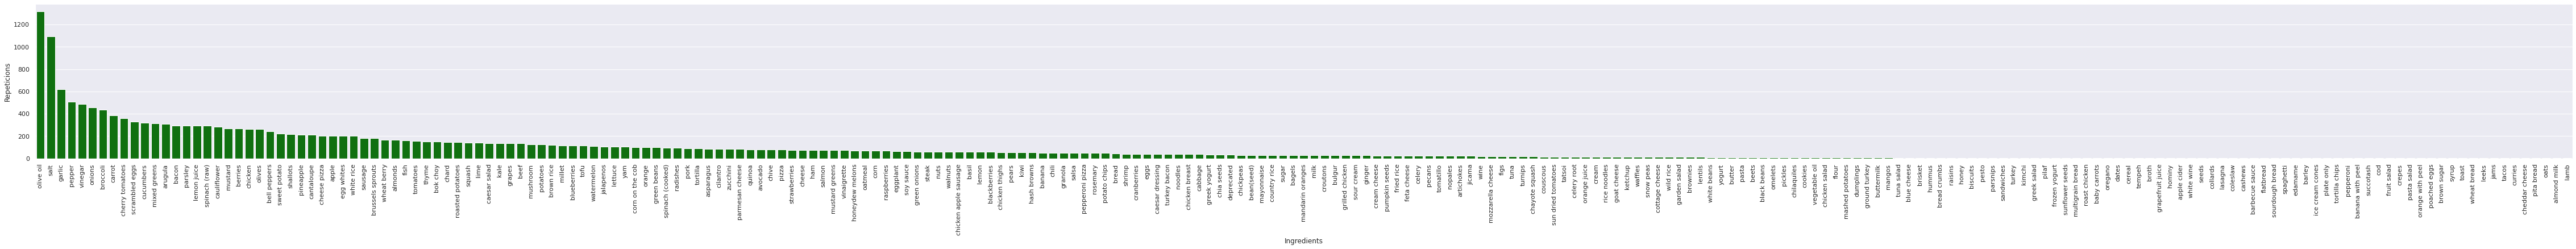

In [102]:
df = pd.DataFrame({"Ingredients":llista_ing_global,"Repeticions":llista_rep_ing})

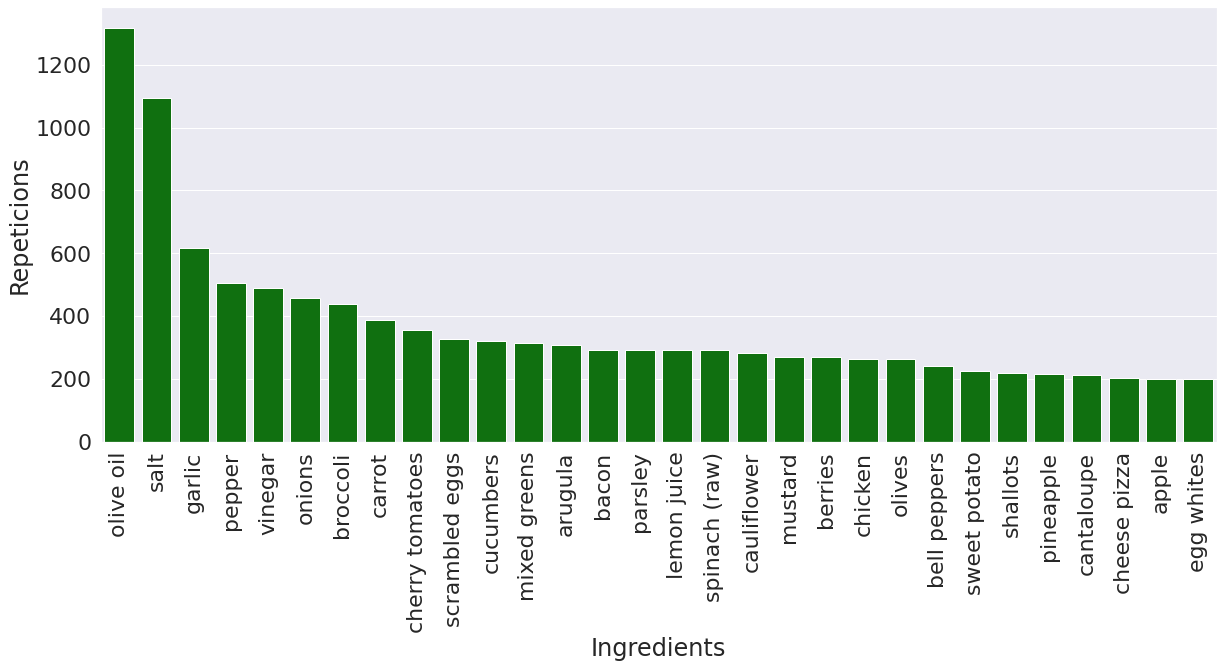

In [149]:
df = pd.DataFrame({"Ingredients":llista_ing_global,"Repeticions":llista_rep_ing})
sns.set(rc={'figure.figsize':(20,8)}, font_scale = 2)
barplot = sns.barplot(x='Ingredients',y='Repeticions',data=df,color='green',order=df.sort_values('Repeticions',ascending = False).Ingredients[0:30])
plt.xticks(rotation=90)
fig = barplot.get_figure()
# fig.savefig("ingredients.png")

[Text(0, 0.5, 'Número de plats'), Text(0.5, 0, 'Nombre d ingredients')]

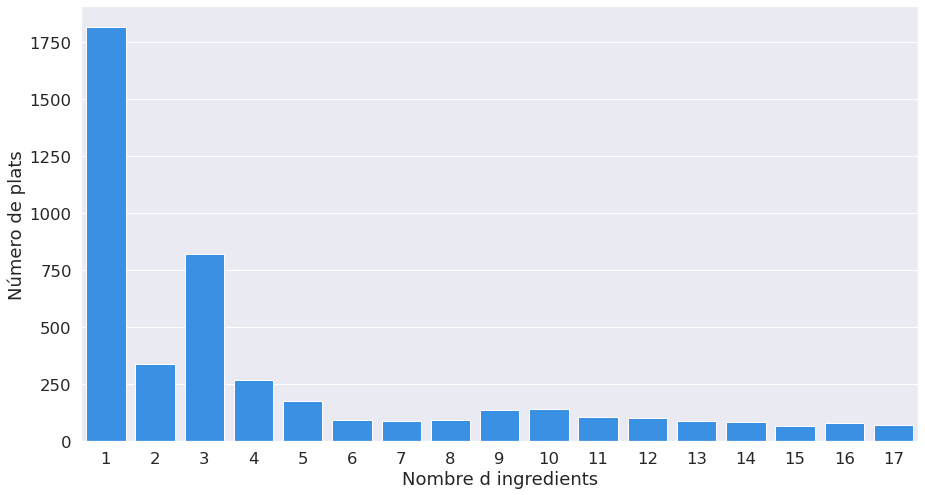

In [8]:
keys = list(dicc_num_ing.keys())
sns.set(rc={'figure.figsize':(15,8)}, font_scale = 1.5)

# get values in the same order as keys, and parse percentage values
vals = [float(dicc_num_ing[k]) for k in keys]
plot = sns.barplot(x=keys, y=vals, color='dodgerblue')
plot.set(ylabel='Número de plats', xlabel='Nombre d ingredients')

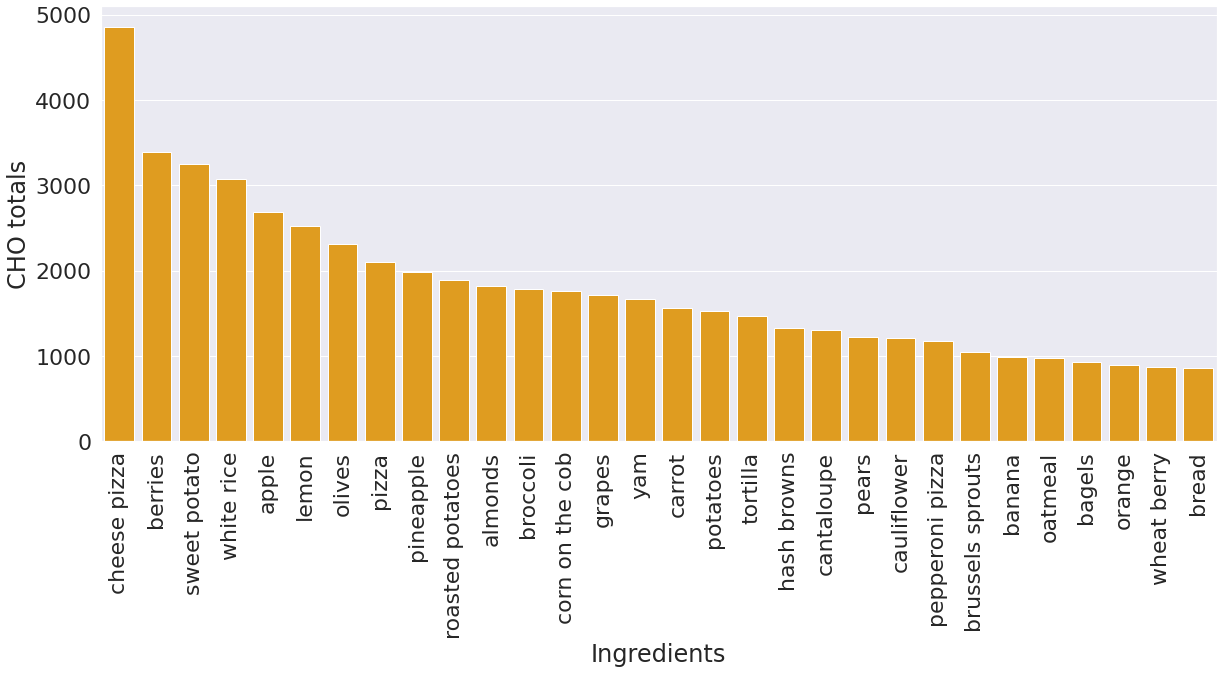

In [153]:
df = pd.DataFrame({"Ingredients":llista_ing_global,"CHO totals":llista_cho_ing})
sns.set(rc={'figure.figsize':(20,8)}, font_scale = 2)
barplot = sns.barplot(x='Ingredients',y='CHO totals',data=df,color='orange',order=df.sort_values('CHO totals',ascending = False).Ingredients[0:30])
plt.xticks(rotation=90)
fig = barplot.get_figure()
# fig.savefig("ingredients.png")